In [19]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [26]:
latency = pd.read_csv("/srv/data/my_shared_data_folder/internet-equity/netrics_latency_2021_short.csv")
latency.head(80)

,time,deviceid,tool,direction,protocol,target,pktloss,method,zip,isp,value,topic,anonipaddr,ipaddrchanged
0,2021-10-15 04:20:59,nm-mngd-20210927-4def23bd,ping_latency,rtt,icmp,Atlanta,0.0,avg,60625,xfinity,39.393,chicago,73.74.99.0,0
1,2021-10-15 04:20:59,nm-mngd-20210927-4def23bd,ping_latency,rtt,icmp,Atlanta,0.0,max,60625,xfinity,46.585,chicago,73.74.99.0,0
2,2021-10-15 04:20:59,nm-mngd-20210927-4def23bd,ping_latency,rtt,icmp,Atlanta,0.0,mdev,60625,xfinity,2.402,chicago,73.74.99.0,0
3,2021-10-15 04:20:59,nm-mngd-20210927-4def23bd,ping_latency,rtt,icmp,Atlanta,0.0,min,60625,xfinity,38.436,chicago,73.74.99.0,0
4,2021-10-15 04:20:59,nm-mngd-20210927-4def23bd,ping_latency,rtt,icmp,Chicago,0.0,avg,60625,xfinity,16.377,chicago,73.74.99.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,2021-10-15 04:20:59,nm-mngd-20210927-4def23bd,last_mile_rtt,rtt,icmp,Cloudflare,0.0,tr_median,60625,xfinity,20.921,chicago,73.74.99.0,0
76,2021-10-15 04:20:59,nm-mngd-20210927-4def23bd,last_mile_rtt,rtt,icmp,Cloudflare,0.0,tr_min,60625,xfinity,20.172,chicago,73.74.99.0,0
77,2021-10-14 19:21:00,nm-mngd-20210927-4def23bd,ping_latency,rtt,icmp,Atlanta,0.0,avg,60625,xfinity,42.181,chicago,73.74.99.0,0
78,2021-10-14 19:21:00,nm-mngd-20210927-4def23bd,ping_latency,rtt,icmp,Atlanta,0.0,max,60625,xfinity,46.464,chicago,73.74.99.0,0


In [3]:
latency.isp.unique

<bound method Series.unique of 0        xfinity
1        xfinity
2        xfinity
3        xfinity
4        xfinity
          ...   
99994    xfinity
99995    xfinity
99996    xfinity
99997    xfinity
99998    xfinity
Name: isp, Length: 99999, dtype: object>

In [4]:
latency.deviceid.unique ()

array(['nm-mngd-20210927-4def23bd'], dtype=object)

In [5]:
latency.time.unique()

array(['2021-10-15 04:20:59', '2021-10-14 19:21:00',
       '2021-10-15 11:00:59', ..., '2021-10-12 07:36:00',
       '2021-10-12 09:11:01', '2021-10-12 16:36:00'], dtype=object)

In [6]:
loc_avg = latency.loc[latency['method'] == 'avg']
loc_avg

,time,deviceid,tool,direction,protocol,target,pktloss,method,zip,isp,value,topic,anonipaddr,ipaddrchanged
0,2021-10-15 04:20:59,nm-mngd-20210927-4def23bd,ping_latency,rtt,icmp,Atlanta,0.0,avg,60625,xfinity,39.393,chicago,73.74.99.0,0
4,2021-10-15 04:20:59,nm-mngd-20210927-4def23bd,ping_latency,rtt,icmp,Chicago,0.0,avg,60625,xfinity,16.377,chicago,73.74.99.0,0
8,2021-10-15 04:20:59,nm-mngd-20210927-4def23bd,ping_latency,rtt,icmp,Denver,0.0,avg,60625,xfinity,38.594,chicago,73.74.99.0,0
12,2021-10-15 04:20:59,nm-mngd-20210927-4def23bd,ping_latency,rtt,icmp,Johannesburg,0.0,avg,60625,xfinity,224.614,chicago,73.74.99.0,0
16,2021-10-15 04:20:59,nm-mngd-20210927-4def23bd,ping_latency,rtt,icmp,Paris,0.0,avg,60625,xfinity,104.971,chicago,73.74.99.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99982,2021-10-12 16:36:00,nm-mngd-20210927-4def23bd,ping_latency,rtt,icmp,google,0.0,avg,60625,xfinity,10.970,chicago,73.74.99.0,0
99986,2021-10-12 16:36:00,nm-mngd-20210927-4def23bd,ping_latency,rtt,icmp,suntimes,0.0,avg,60625,xfinity,12.348,chicago,73.74.99.0,0
99990,2021-10-12 16:36:00,nm-mngd-20210927-4def23bd,ping_latency,rtt,icmp,tribune,0.0,avg,60625,xfinity,10.509,chicago,73.74.99.0,0
99994,2021-10-12 16:36:00,nm-mngd-20210927-4def23bd,ping_latency,rtt,icmp,uchicago,0.0,avg,60625,xfinity,13.623,chicago,73.74.99.0,0


In [7]:
loc_avg5 = loc_avg.iloc[::5, :]
loc_avg5

,time,deviceid,tool,direction,protocol,target,pktloss,method,zip,isp,value,topic,anonipaddr,ipaddrchanged
0,2021-10-15 04:20:59,nm-mngd-20210927-4def23bd,ping_latency,rtt,icmp,Atlanta,0.0,avg,60625,xfinity,39.393,chicago,73.74.99.0,0
20,2021-10-15 04:20:59,nm-mngd-20210927-4def23bd,ping_latency,rtt,icmp,Seattle,0.0,avg,60625,xfinity,63.079,chicago,73.74.99.0,0
40,2021-10-15 04:20:59,nm-mngd-20210927-4def23bd,ping_latency,rtt,icmp,facebook,0.0,avg,60625,xfinity,10.324,chicago,73.74.99.0,0
60,2021-10-15 04:20:59,nm-mngd-20210927-4def23bd,ping_latency,rtt,icmp,wikipedia,0.0,avg,60625,xfinity,31.792,chicago,73.74.99.0,0
85,2021-10-14 19:21:00,nm-mngd-20210927-4def23bd,ping_latency,rtt,icmp,Denver,0.0,avg,60625,xfinity,40.115,chicago,73.74.99.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99897,2021-10-12 09:11:01,nm-mngd-20210927-4def23bd,ping_latency,rtt,icmp,amazon,0.0,avg,60625,xfinity,12.424,chicago,73.74.99.0,0
99917,2021-10-12 09:11:01,nm-mngd-20210927-4def23bd,ping_latency,rtt,icmp,uchicago,0.0,avg,60625,xfinity,13.673,chicago,73.74.99.0,0
99942,2021-10-12 16:36:00,nm-mngd-20210927-4def23bd,ping_latency,rtt,icmp,Chicago,0.0,avg,60625,xfinity,16.619,chicago,73.74.99.0,0
99962,2021-10-12 16:36:00,nm-mngd-20210927-4def23bd,ping_latency,rtt,icmp,Stockholm,0.0,avg,60625,xfinity,121.556,chicago,73.74.99.0,0


In [8]:
loc_avg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23285 entries, 0 to 99998
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   time           23285 non-null  object 
 1   deviceid       23285 non-null  object 
 2   tool           23285 non-null  object 
 3   direction      23285 non-null  object 
 4   protocol       23285 non-null  object 
 5   target         23280 non-null  object 
 6   pktloss        22007 non-null  float64
 7   method         23285 non-null  object 
 8   zip            23285 non-null  int64  
 9   isp            23285 non-null  object 
 10  value          23285 non-null  float64
 11  topic          23285 non-null  object 
 12  anonipaddr     23285 non-null  object 
 13  ipaddrchanged  23285 non-null  int64  
dtypes: float64(2), int64(2), object(10)
memory usage: 2.7+ MB


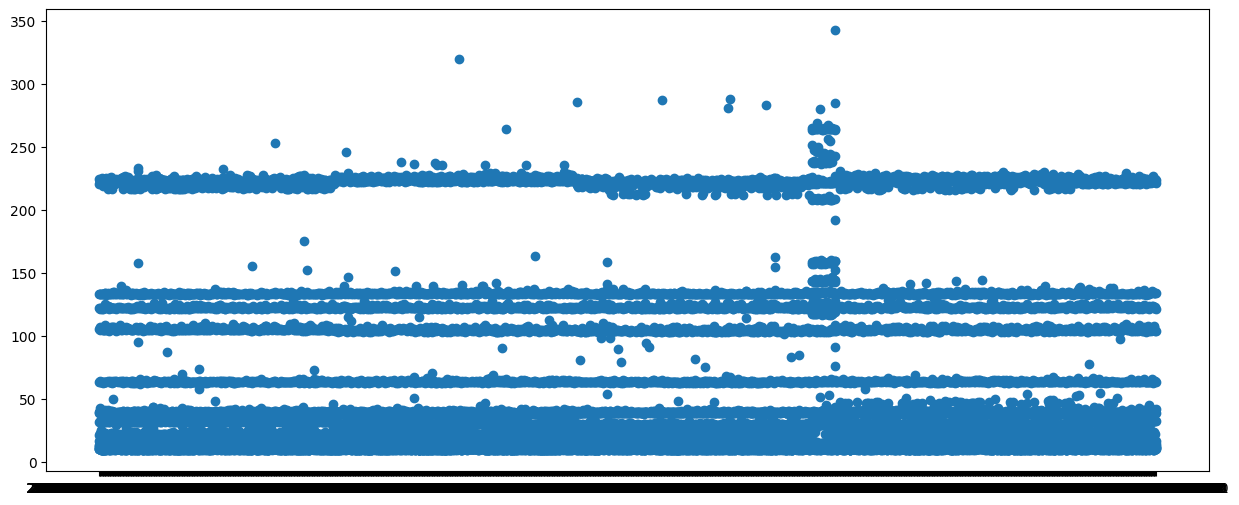

In [9]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15,6))
plt.scatter(x=loc_avg['time'], y=loc_avg['value'])

plt.show()

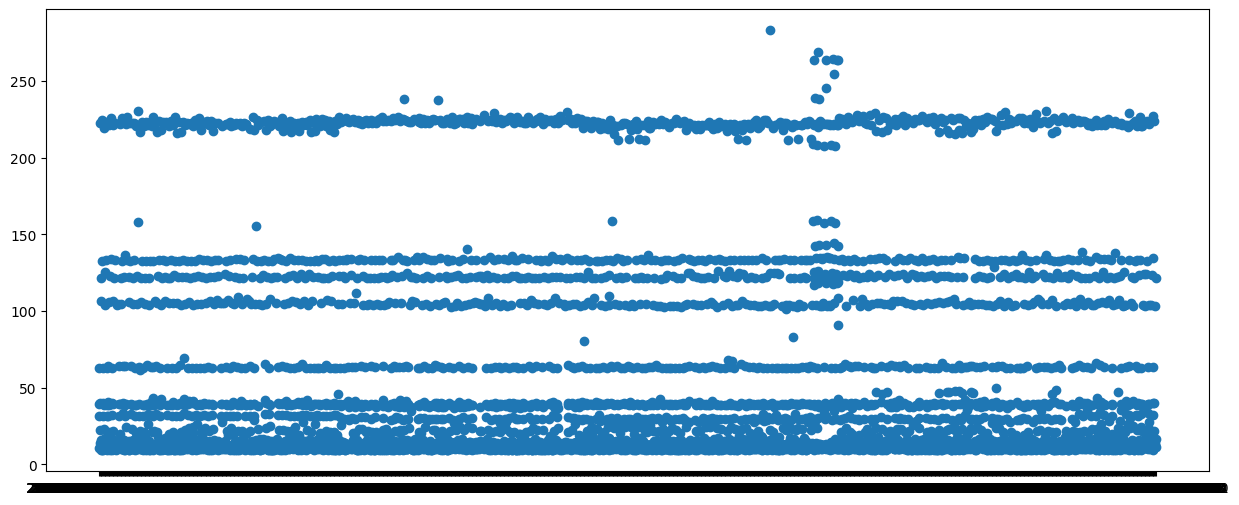

In [10]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15,6))
plt.scatter(x=loc_avg5['time'], y=loc_avg5['value'])

plt.show()

In [11]:
def date(x):
    string = x
    return string[5:10]


loc_avg.loc[:, "date"] = loc_avg.loc[:,"time"].apply(date)

/tmp/ipykernel_718174/1192786013.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loc_avg.loc[:, "date"] = loc_avg.loc[:,"time"].apply(date)


In [12]:
loc_avg.head()

,time,deviceid,tool,direction,protocol,target,pktloss,method,zip,isp,value,topic,anonipaddr,ipaddrchanged,date
0,2021-10-15 04:20:59,nm-mngd-20210927-4def23bd,ping_latency,rtt,icmp,Atlanta,0.0,avg,60625,xfinity,39.393,chicago,73.74.99.0,0,10-15
4,2021-10-15 04:20:59,nm-mngd-20210927-4def23bd,ping_latency,rtt,icmp,Chicago,0.0,avg,60625,xfinity,16.377,chicago,73.74.99.0,0,10-15
8,2021-10-15 04:20:59,nm-mngd-20210927-4def23bd,ping_latency,rtt,icmp,Denver,0.0,avg,60625,xfinity,38.594,chicago,73.74.99.0,0,10-15
12,2021-10-15 04:20:59,nm-mngd-20210927-4def23bd,ping_latency,rtt,icmp,Johannesburg,0.0,avg,60625,xfinity,224.614,chicago,73.74.99.0,0,10-15
16,2021-10-15 04:20:59,nm-mngd-20210927-4def23bd,ping_latency,rtt,icmp,Paris,0.0,avg,60625,xfinity,104.971,chicago,73.74.99.0,0,10-15


In [13]:
loc_date1 = loc_avg.loc[loc_avg['date'] == '10-12']
loc_date1

,time,deviceid,tool,direction,protocol,target,pktloss,method,zip,isp,value,topic,anonipaddr,ipaddrchanged,date
92473,2021-10-12 05:21:01,nm-mngd-20210927-4def23bd,ping_latency,rtt,icmp,Atlanta,0.0,avg,60625,xfinity,38.733,chicago,73.74.99.0,0,10-12
92477,2021-10-12 05:21:01,nm-mngd-20210927-4def23bd,ping_latency,rtt,icmp,Chicago,0.0,avg,60625,xfinity,16.884,chicago,73.74.99.0,0,10-12
92481,2021-10-12 05:21:01,nm-mngd-20210927-4def23bd,ping_latency,rtt,icmp,Denver,0.0,avg,60625,xfinity,38.625,chicago,73.74.99.0,0,10-12
92485,2021-10-12 05:21:01,nm-mngd-20210927-4def23bd,ping_latency,rtt,icmp,Johannesburg,0.0,avg,60625,xfinity,222.879,chicago,73.74.99.0,0,10-12
92489,2021-10-12 05:21:01,nm-mngd-20210927-4def23bd,ping_latency,rtt,icmp,Paris,0.0,avg,60625,xfinity,103.452,chicago,73.74.99.0,0,10-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99982,2021-10-12 16:36:00,nm-mngd-20210927-4def23bd,ping_latency,rtt,icmp,google,0.0,avg,60625,xfinity,10.970,chicago,73.74.99.0,0,10-12
99986,2021-10-12 16:36:00,nm-mngd-20210927-4def23bd,ping_latency,rtt,icmp,suntimes,0.0,avg,60625,xfinity,12.348,chicago,73.74.99.0,0,10-12
99990,2021-10-12 16:36:00,nm-mngd-20210927-4def23bd,ping_latency,rtt,icmp,tribune,0.0,avg,60625,xfinity,10.509,chicago,73.74.99.0,0,10-12
99994,2021-10-12 16:36:00,nm-mngd-20210927-4def23bd,ping_latency,rtt,icmp,uchicago,0.0,avg,60625,xfinity,13.623,chicago,73.74.99.0,0,10-12


In [14]:
loc_date2 = loc_avg.loc[loc_avg['date'] == '10-14']
loc_date2

,time,deviceid,tool,direction,protocol,target,pktloss,method,zip,isp,value,topic,anonipaddr,ipaddrchanged,date
77,2021-10-14 19:21:00,nm-mngd-20210927-4def23bd,ping_latency,rtt,icmp,Atlanta,0.0,avg,60625,xfinity,42.181,chicago,73.74.99.0,0,10-14
81,2021-10-14 19:21:00,nm-mngd-20210927-4def23bd,ping_latency,rtt,icmp,Chicago,0.0,avg,60625,xfinity,17.208,chicago,73.74.99.0,0,10-14
85,2021-10-14 19:21:00,nm-mngd-20210927-4def23bd,ping_latency,rtt,icmp,Denver,0.0,avg,60625,xfinity,40.115,chicago,73.74.99.0,0,10-14
89,2021-10-14 19:21:00,nm-mngd-20210927-4def23bd,ping_latency,rtt,icmp,Johannesburg,0.0,avg,60625,xfinity,224.026,chicago,73.74.99.0,0,10-14
93,2021-10-14 19:21:00,nm-mngd-20210927-4def23bd,ping_latency,rtt,icmp,Paris,0.0,avg,60625,xfinity,104.623,chicago,73.74.99.0,0,10-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22418,2021-10-14 23:16:00,nm-mngd-20210927-4def23bd,ping_latency,rtt,icmp,tribune,0.0,avg,60625,xfinity,9.726,chicago,73.74.99.0,0,10-14
22422,2021-10-14 23:16:00,nm-mngd-20210927-4def23bd,ping_latency,rtt,icmp,uchicago,0.0,avg,60625,xfinity,12.858,chicago,73.74.99.0,0,10-14
22426,2021-10-14 23:16:00,nm-mngd-20210927-4def23bd,ping_latency,rtt,icmp,wikipedia,0.0,avg,60625,xfinity,32.144,chicago,73.74.99.0,0,10-14
22430,2021-10-14 23:16:00,nm-mngd-20210927-4def23bd,ping_latency,rtt,icmp,youtube,0.0,avg,60625,xfinity,10.954,chicago,73.74.99.0,0,10-14


In [15]:
loc_date3 = loc_avg.loc[loc_avg['date'] == '10-15']
loc_date3

,time,deviceid,tool,direction,protocol,target,pktloss,method,zip,isp,value,topic,anonipaddr,ipaddrchanged,date
0,2021-10-15 04:20:59,nm-mngd-20210927-4def23bd,ping_latency,rtt,icmp,Atlanta,0.0,avg,60625,xfinity,39.393,chicago,73.74.99.0,0,10-15
4,2021-10-15 04:20:59,nm-mngd-20210927-4def23bd,ping_latency,rtt,icmp,Chicago,0.0,avg,60625,xfinity,16.377,chicago,73.74.99.0,0,10-15
8,2021-10-15 04:20:59,nm-mngd-20210927-4def23bd,ping_latency,rtt,icmp,Denver,0.0,avg,60625,xfinity,38.594,chicago,73.74.99.0,0,10-15
12,2021-10-15 04:20:59,nm-mngd-20210927-4def23bd,ping_latency,rtt,icmp,Johannesburg,0.0,avg,60625,xfinity,224.614,chicago,73.74.99.0,0,10-15
16,2021-10-15 04:20:59,nm-mngd-20210927-4def23bd,ping_latency,rtt,icmp,Paris,0.0,avg,60625,xfinity,104.971,chicago,73.74.99.0,0,10-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22341,2021-10-15 01:21:03,nm-mngd-20210927-4def23bd,ping_latency,rtt,icmp,tribune,0.0,avg,60625,xfinity,25.629,chicago,73.74.99.0,0,10-15
22345,2021-10-15 01:21:03,nm-mngd-20210927-4def23bd,ping_latency,rtt,icmp,uchicago,0.0,avg,60625,xfinity,13.016,chicago,73.74.99.0,0,10-15
22349,2021-10-15 01:21:03,nm-mngd-20210927-4def23bd,ping_latency,rtt,icmp,wikipedia,0.0,avg,60625,xfinity,31.529,chicago,73.74.99.0,0,10-15
22353,2021-10-15 01:21:03,nm-mngd-20210927-4def23bd,ping_latency,rtt,icmp,youtube,0.0,avg,60625,xfinity,28.503,chicago,73.74.99.0,0,10-15


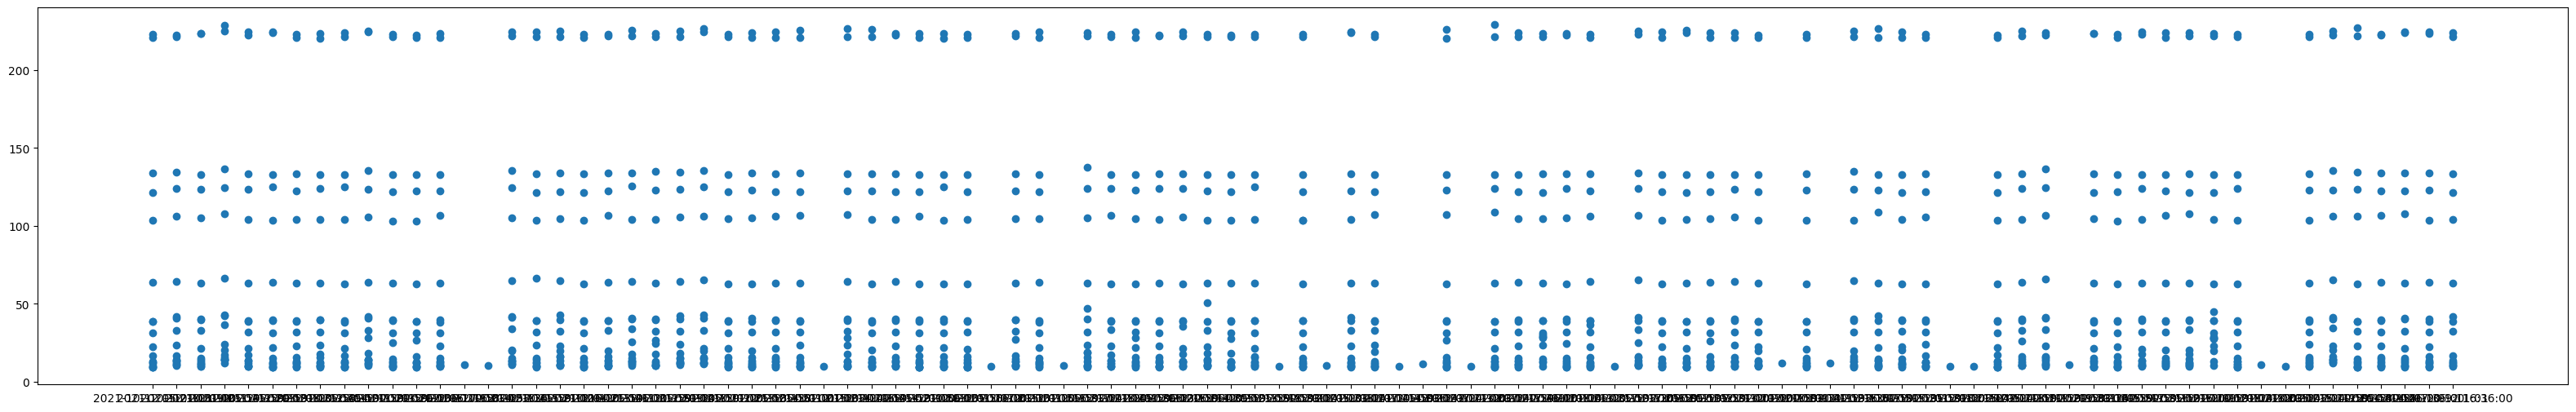

In [16]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(40,6))
plt.scatter(x=loc_date1['time'], y=loc_date1['value'])

plt.show()

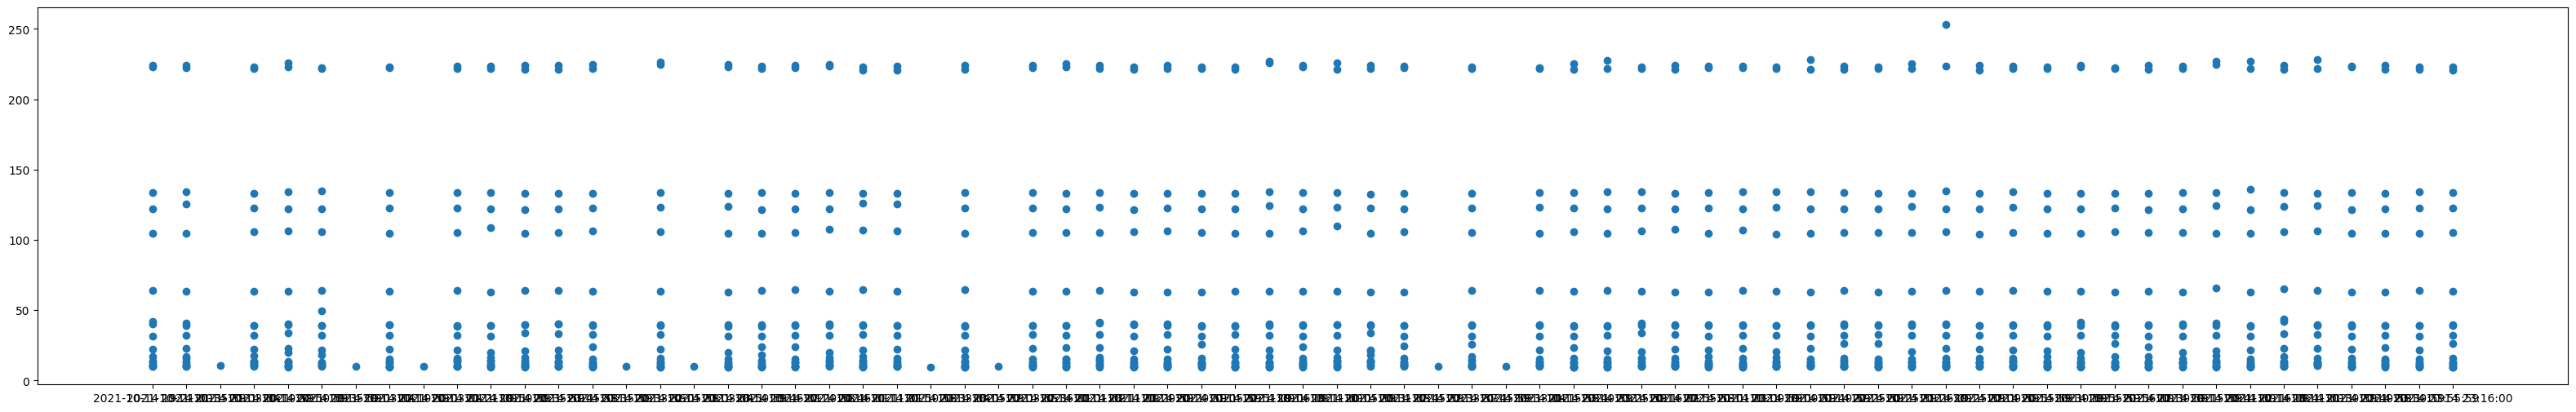

In [17]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(40,6))
plt.scatter(x=loc_date2['time'], y=loc_date2['value'])

plt.show()

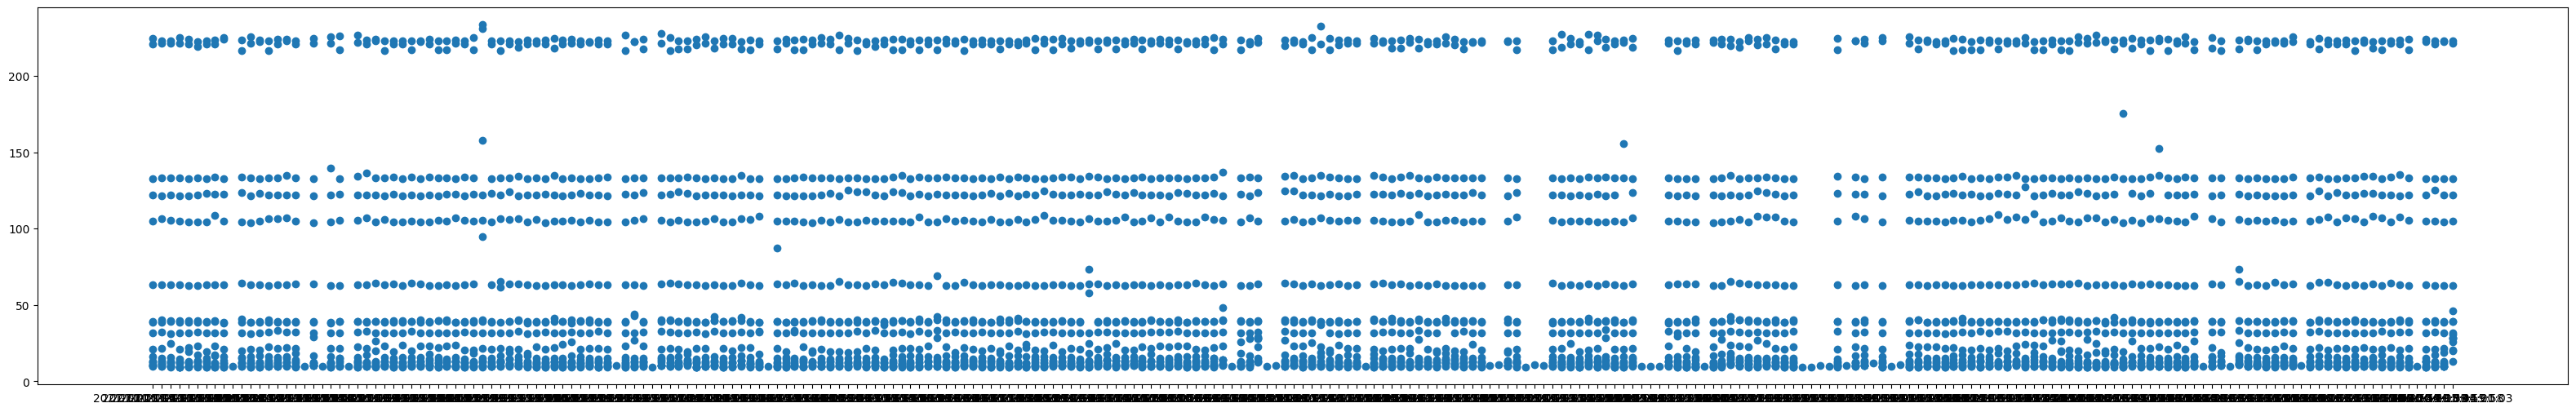

In [18]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(40,6))
plt.scatter(x=loc_date3['time'], y=loc_date3['value'])

plt.show()